In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn.cross_validation import train_test_split 

/home/pank/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)
bos = pd.DataFrame(boston.data)
print(bos.head())
bos.columns = boston.feature_names
print(bos.head())
print(boston.target.shape)
bos['PRICE'] = boston.target
print(bos.head())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

In [4]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

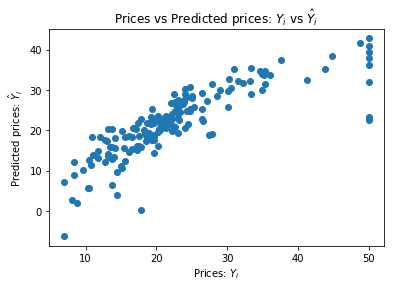

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [8]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.541367275618338


In [9]:
lm.score(X_test,Y_test)

0.695538800550641

In [10]:
from sklearn.tree import DecisionTreeRegressor

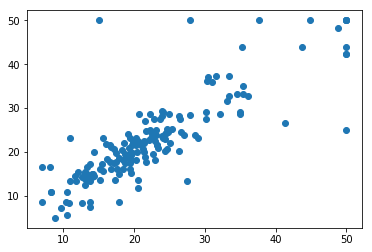

In [11]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)
plt.scatter(Y_test, Y_pred)

In [12]:
me=sklearn.metrics.mean_squared_error(Y_test,Y_pred)
print(me)

30.26922155688623


In [13]:
DT.score(X_test,Y_test)

0.6771071472290453

In [14]:
from sklearn.neural_network import MLPRegressor

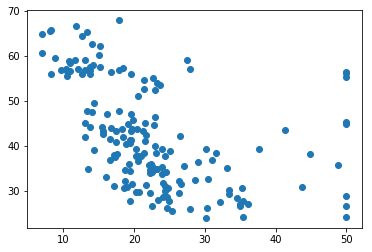

In [15]:
Nr=MLPRegressor()
Nr.fit(X_train,Y_train)
Y_pred=Nr.predict(X_test)
plt.scatter(Y_test, Y_pred)

In [16]:
m=sklearn.metrics.mean_squared_error(Y_test,Y_pred)
print(m)

721.7076105907444


In [17]:
from sklearn.svm import SVR
s=SVR()

93.21912321793232


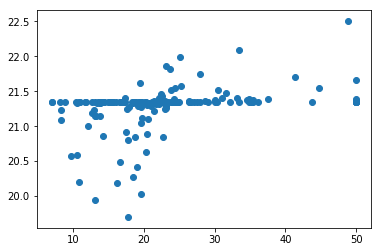

In [18]:
s.fit(X_train,Y_train)
Y_pred=s.predict(X_test)
ma=sklearn.metrics.mean_squared_error(Y_test,Y_pred)
print(ma)
plt.scatter(Y_test, Y_pred)


In [19]:
#Implement Gradient regressor
from sklearn.ensemble import GradientBoostingRegressor

93.21912321793232


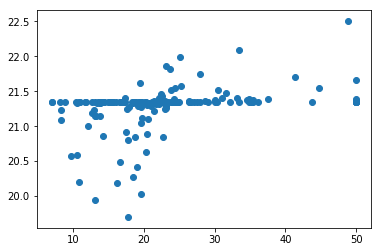

In [20]:
k=GradientBoostingRegressor()
k.fit(X_train,Y_train)
Y_pred=s.predict(X_test)
m=sklearn.metrics.mean_squared_error(Y_test,Y_pred)
print(m)
plt.scatter(Y_test, Y_pred)

In [21]:
#RDF regressor


In [22]:
from keras.models import Sequential

model = Sequential()

/home/pank/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
from keras.layers import Dense

model.add(Dense(units=128, activation='relu',input_dim=13)) # decide in 2's power
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)
loss=model.evaluate(X_test,Y_test)
prd=model.predict(X_test)
print(loss)
print(prd)

Epoch 1/300
339/339 [==============================] - 0s 859us/step - loss: 337.8979 - acc: 0.0000e+00
Epoch 2/300
339/339 [==============================] - 0s 75us/step - loss: 102.2813 - acc: 0.0029
Epoch 3/300
339/339 [==============================] - 0s 87us/step - loss: 61.1781 - acc: 0.0118
Epoch 4/300
339/339 [==============================] - 0s 82us/step - loss: 51.5296 - acc: 0.0147
Epoch 5/300
339/339 [==============================] - 0s 78us/step - loss: 44.6394 - acc: 0.0088
Epoch 6/300
339/339 [==============================] - 0s 88us/step - loss: 41.2904 - acc: 0.0088
Epoch 7/300
339/339 [==============================] - 0s 64us/step - loss: 44.0915 - acc: 0.0088
Epoch 8/300
339/339 [==============================] - 0s 68us/step - loss: 36.0570 - acc: 0.0177
Epoch 9/300
339/339 [==============================] - 0s 56us/step - loss: 35.7727 - acc: 0.0059
Epoch 10/300
339/339 [==============================] - 0s 91us/step - loss: 31.5546 - acc: 0.0059
Epoch 11/300

339/339 [==============================] - 0s 94us/step - loss: 14.9879 - acc: 0.0206
Epoch 84/300
339/339 [==============================] - 0s 72us/step - loss: 14.5856 - acc: 0.0177
Epoch 85/300
339/339 [==============================] - 0s 77us/step - loss: 18.4370 - acc: 0.0118
Epoch 86/300
339/339 [==============================] - 0s 62us/step - loss: 15.2313 - acc: 0.0147
Epoch 87/300
339/339 [==============================] - 0s 73us/step - loss: 13.3319 - acc: 0.0147
Epoch 88/300
339/339 [==============================] - 0s 64us/step - loss: 17.7666 - acc: 0.0088
Epoch 89/300
339/339 [==============================] - 0s 74us/step - loss: 13.5165 - acc: 0.0177
Epoch 90/300
339/339 [==============================] - 0s 68us/step - loss: 13.9233 - acc: 0.0265
Epoch 91/300
339/339 [==============================] - 0s 76us/step - loss: 14.6853 - acc: 0.0324
Epoch 92/300
339/339 [==============================] - 0s 68us/step - loss: 12.7781 - acc: 0.0118
Epoch 93/300
339/339 [=

339/339 [==============================] - 0s 106us/step - loss: 11.7939 - acc: 0.0206
Epoch 166/300
339/339 [==============================] - 0s 82us/step - loss: 11.7283 - acc: 0.0147
Epoch 167/300
339/339 [==============================] - 0s 112us/step - loss: 9.7851 - acc: 0.0265
Epoch 168/300
339/339 [==============================] - 0s 83us/step - loss: 12.5870 - acc: 0.0236
Epoch 169/300
339/339 [==============================] - 0s 101us/step - loss: 12.2790 - acc: 0.0206
Epoch 170/300
339/339 [==============================] - 0s 114us/step - loss: 10.9041 - acc: 0.0177
Epoch 171/300
339/339 [==============================] - 0s 84us/step - loss: 13.1749 - acc: 0.0147
Epoch 172/300
339/339 [==============================] - 0s 82us/step - loss: 12.9194 - acc: 0.0206
Epoch 173/300
339/339 [==============================] - 0s 90us/step - loss: 13.3253 - acc: 0.0236
Epoch 174/300
339/339 [==============================] - 0s 89us/step - loss: 14.5968 - acc: 0.0088
Epoch 175/3

339/339 [==============================] - 0s 100us/step - loss: 9.6850 - acc: 0.0295
Epoch 248/300
339/339 [==============================] - 0s 80us/step - loss: 9.0920 - acc: 0.0295
Epoch 249/300
339/339 [==============================] - 0s 82us/step - loss: 8.9529 - acc: 0.0324
Epoch 250/300
339/339 [==============================] - 0s 82us/step - loss: 9.1463 - acc: 0.0236
Epoch 251/300
339/339 [==============================] - 0s 69us/step - loss: 8.4512 - acc: 0.0265
Epoch 252/300
339/339 [==============================] - 0s 74us/step - loss: 8.7431 - acc: 0.0236
Epoch 253/300
339/339 [==============================] - 0s 63us/step - loss: 9.7394 - acc: 0.0295
Epoch 254/300
339/339 [==============================] - 0s 79us/step - loss: 8.0849 - acc: 0.0118
Epoch 255/300
339/339 [==============================] - 0s 65us/step - loss: 8.1673 - acc: 0.0354
Epoch 256/300
339/339 [==============================] - 0s 75us/step - loss: 8.6987 - acc: 0.0147
Epoch 257/300
339/339 [